# Reference Datasets

I am using this notebook to validate my ResNet18 implementation against some tfds datasets.

In [1]:
%pip install tensorflow --quiet
%pip install tensorflow-datasets --quiet
%pip install matplotlib --quiet


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from resnet18 import *
import tensorflow_datasets as tfds

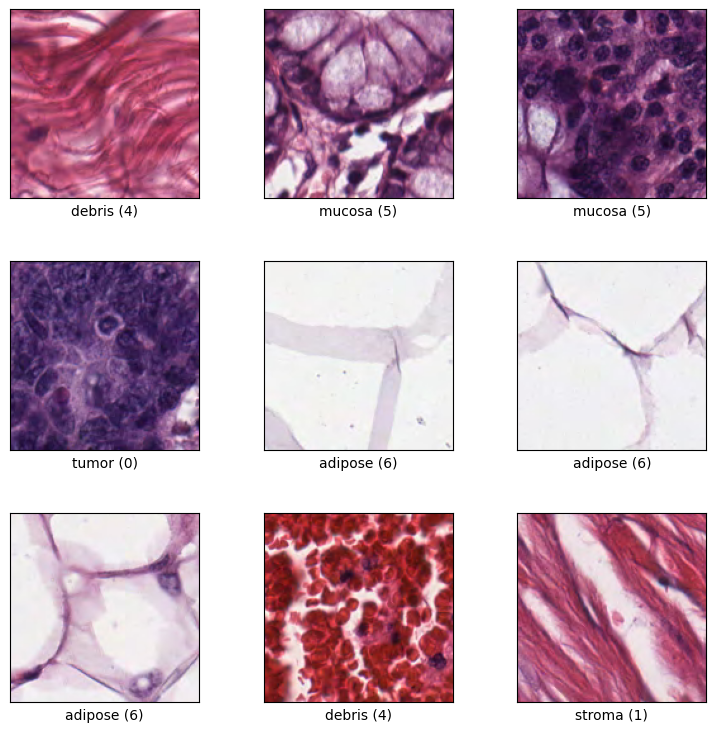

In [8]:
import matplotlib
ds, info = tfds.load('colorectal_histology', split='train', shuffle_files=True, with_info=True)
fig = tfds.show_examples(ds, info)
ds = ds.take(100)

In [9]:
# batch_size = 100
# image, label = tfds.as_numpy(tfds.load(
#     'colorectal_histology',
#     split='train',
#     batch_size=-1,
#     as_supervised=True,
# ))

In [10]:
my_resnet = ResNet18(n_classes=8)
input = tf.random.uniform((1, 64, 64, 3))
target = tf.Variable([0, 0, 1, 0], dtype=tf.float32)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop
# Reshape inputs
# print(image.shape)
# image = tf.cast(image, dtype=tf.float32)
# label = tf.cast(item["label"], dtype=tf.float32)
epochs = 3
left_cur = 0
losses = []

for epoch in range(epochs):
    for item in ds:
        image = tf.cast(item["image"], dtype=tf.float32)
        image = tf.reshape(image, shape=((1,) + image.shape))
        label = tf.reshape(tf.one_hot(item["label"], 8), shape=(1,8))
        label = tf.cast(label, dtype=tf.float32)
        print(label.shape)
        print(label)
        print(item["label"])
        # # batch = tf.reshape(image[left_cur:batch_cur], shape=((1,) + image[left_cur:batch_cur].shape))
        # # labels = label[left_cur:batch_cur]
        # # batch = tf.cast(batch, dtype=tf.float32)
        # # labels = tf.cast(labels, dtype=tf.float32)
        loss = train_step(my_resnet, image, label, optimizer)
        losses.append(loss.numpy())
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")

# Create a checkpoint
finish_point = tf.train.Checkpoint(model=my_resnet)
finish_point.save('./colorectal_resnet18model')

/opt/homebrew/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


(1, 8)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 8), dtype=float32)
tf.Tensor(6, shape=(), dtype=int64)
Original x: [[[[238. 211. 226.]
   [232. 205. 220.]
   [233. 210. 230.]
   ...
   [242. 242. 240.]
   [242. 241. 239.]
   [244. 243. 241.]]

  [[225. 213. 223.]
   [223. 211. 221.]
   [225. 208. 216.]
   ...
   [243. 242. 240.]
   [243. 242. 240.]
   [244. 243. 241.]]

  [[225. 209. 222.]
   [228. 212. 225.]
   [230. 214. 224.]
   ...
   [243. 242. 240.]
   [243. 242. 240.]
   [244. 243. 241.]]

  ...

  [[239. 243. 244.]
   [239. 243. 244.]
   [239. 243. 244.]
   ...
   [241. 241. 241.]
   [240. 242. 241.]
   [240. 242. 241.]]

  [[239. 243. 244.]
   [239. 243. 244.]
   [239. 243. 244.]
   ...
   [241. 241. 241.]
   [240. 242. 241.]
   [240. 242. 241.]]

  [[239. 243. 244.]
   [239. 243. 244.]
   [239. 243. 244.]
   ...
   [241. 241. 241.]
   [240. 242. 241.]
   [240. 242. 241.]]]]
Normalized x: [[[[0.93333334 0.827451   0.8862745 ]
   [0.9098039  0.8039216  0.8627451 ]
   [0

'./colorectal_resnet18model-1'

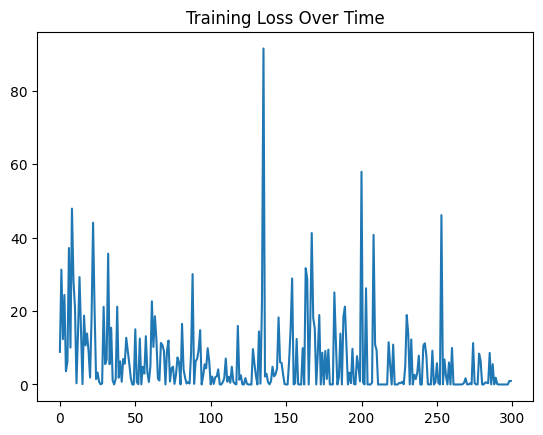

In [18]:
plt.title("Training Loss Over Time")
plt.xlabel("Epoch")
plt.plot(losses)